### Hierarchical Clustering 

In [4]:
import numpy as np # type: ignore
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
sns.set_style("dark")

In [5]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])
X1

array([[1, 1],
       [3, 2],
       [9, 1],
       [3, 7],
       [7, 2],
       [9, 7],
       [4, 8],
       [8, 3],
       [1, 4]])

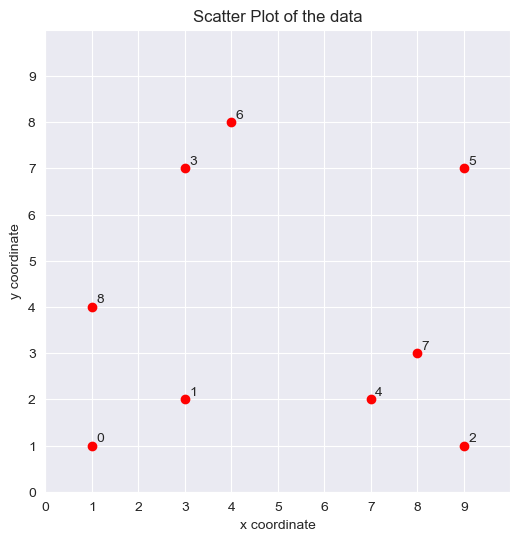

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(X1[:,0], X1[:,1], c='r')


for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
plt.xlabel('x coordinate' )
plt.ylabel('y coordinate' )
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10) )
plt.grid()
plt.show()

In [8]:
Z1 = linkage(X1, method='single', metric='euclidean' )
Z2 = linkage(X1, method='complete', metric='euclidean' )
Z3 = linkage(X1, method='average', metric='euclidean' )
Z4 = linkage(X1, method='ward', metric='euclidean' )             

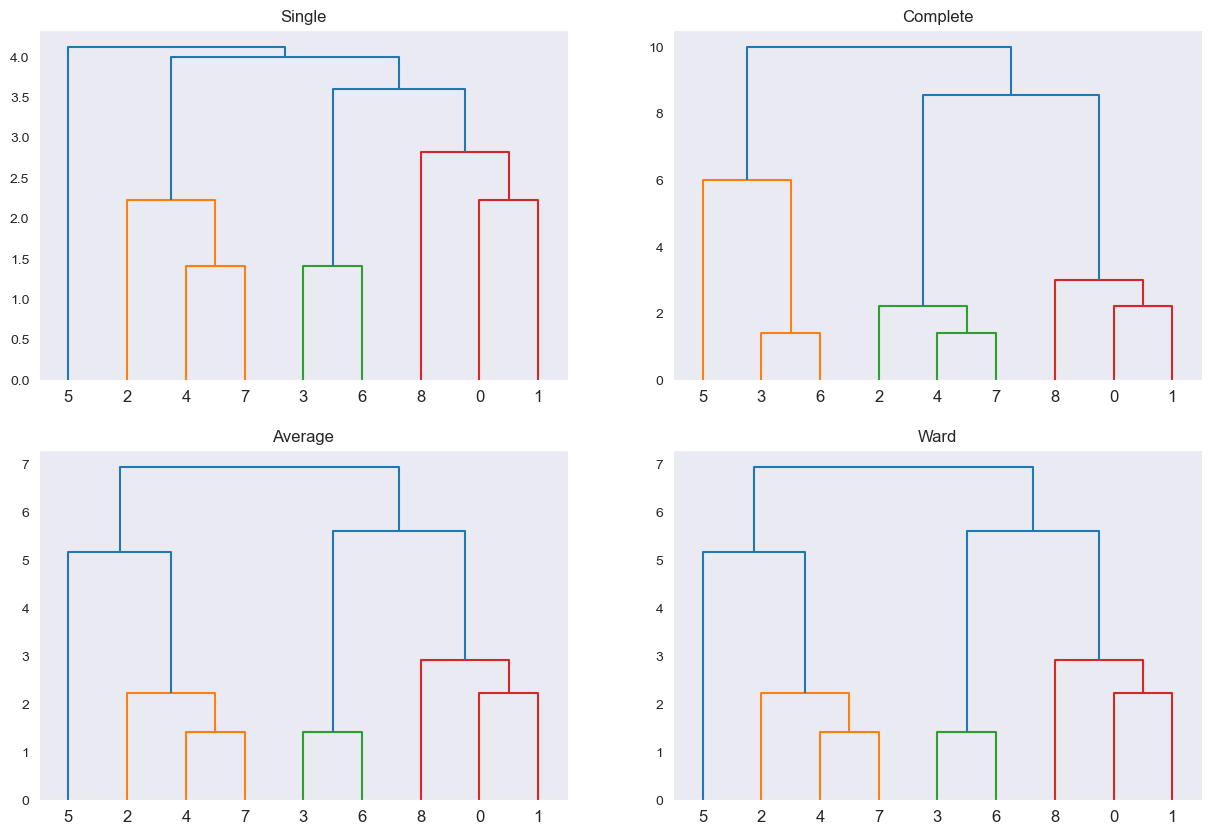

In [9]:
plt.figure(figsize=(15, 10))

tybe = ["Single", "Complete","Average","Ward"]
all_z = [Z1,Z2,Z3,Z3]

for i in range(len(tybe)):
    plt.subplot(2, 2, i+1)
    dendrogram(all_z[i])
    plt.title(tybe[i])
plt.show()

In [10]:
f1 = fcluster(Z1, 2) # 2 no. of dimantion
# f1 = fcluster(Z1, 2, criterton='maxclust') # criterion to Finds a minimum
print(f"Clusters: {f1}")

Clusters: [1 1 1 1 1 1 1 1 1]


In [11]:
from sklearn.cluster import AgglomerativeClustering  # type: ignore
Z1 = AgglomerativeClustering(n_clusters=1, linkage='single')
Z1.fit_predict(X1)
print(Z1.labels_)

[0 0 0 0 0 0 0 0 0]


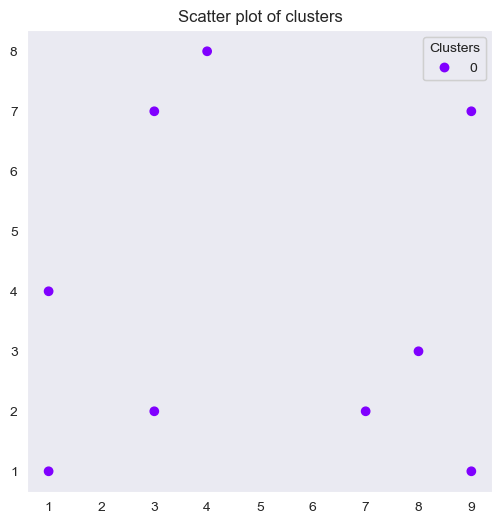

In [62]:
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow' )
legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist (legend)
plt.title('Scatter plot of clusters')
plt.show()

## Read data CSv file

In [63]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [64]:
data_frame = df.iloc[:,1:]
data_frame.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [65]:
Z2 = linkage(data_frame, method="single", metric="euclidean")

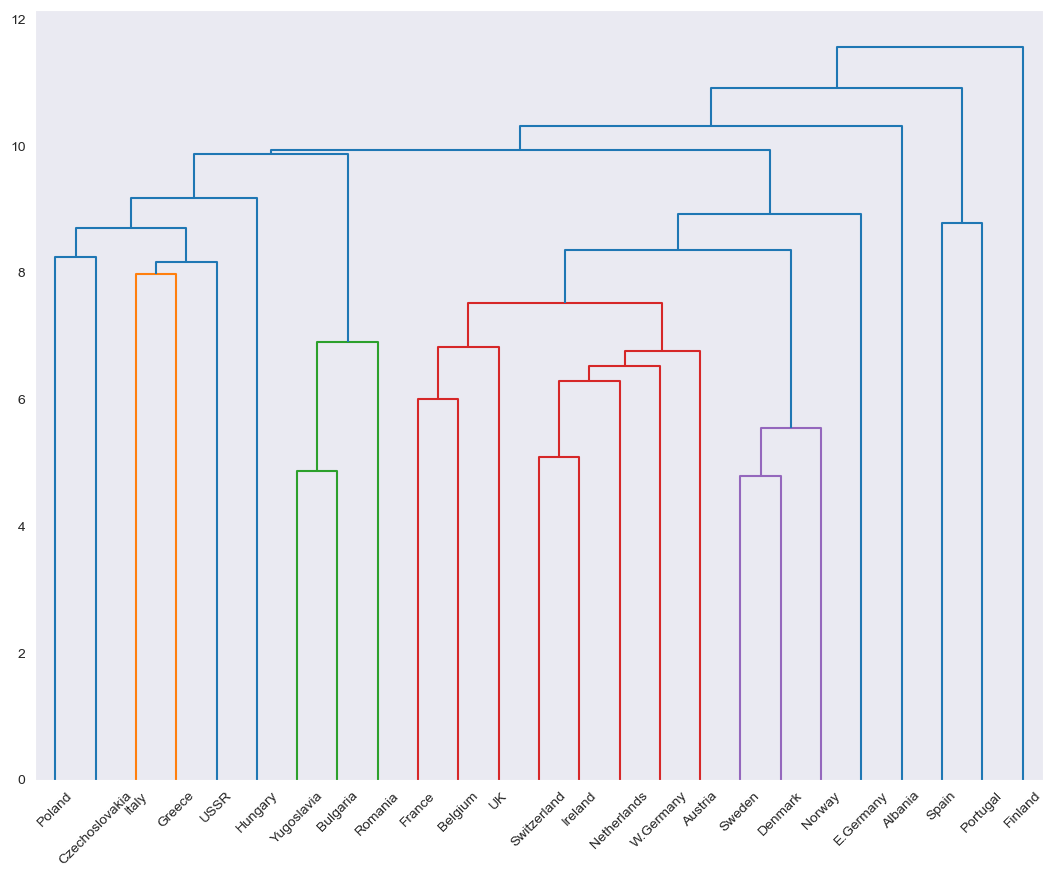

In [66]:
labelList = list(df['Country'])
plt.figure(figsize=(13, 10))
dendrogram (
Z2,
orientation='top',
labels=labelList,
distance_sort='descending',
leaf_font_size=10
)
plt.show()

In [67]:
df['Clusters'] = fcluster(Z2, 2)
df

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg,Clusters
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,1
6,E.Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,1
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,1
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,1
